In [1]:
# Kullanılan kütüphaneler

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
import string
from itertools import chain


In [2]:
# satırların daha net bir şekilde ipynb dosyasında görülmesi için düzenleme yapıldı. 

pd.set_option('display.max_rows', 100)

In [3]:
# Tüm dosyalar okutuldu.

costumers = pd.read_csv("customers_dataset.csv")
geolocation = pd.read_csv("geolocation_dataset.csv")
orderItems = pd.read_csv("order_items_dataset.csv")
orderPayments = pd.read_csv("order_payments_dataset.csv")
orderReviews = pd.read_csv("order_reviews_dataset.csv")
orders = pd.read_csv("orders_dataset.csv")
productCategory = pd.read_csv("product_category_name_translation.csv")
products = pd.read_csv("products_dataset.csv")
sellers = pd.read_csv("sellers_dataset.csv")

In [4]:
# Bir veri setine dair düzenli olarak edinilmesine ihtiyaç duyulan bilgi alma işlemleri fonksiyonlaştırıldı. 

def info_df(dataframe):

    # boyut bilgisi
    print("----------------------------- Shape -----------------------------")
    print(dataframe.shape)

    # df genel bilgi (tip)
    print("----------------------------- Info -----------------------------")
    print(dataframe.info())

    # veri setinde herhangi bir eksik değer var mı?
    print("----------------------------- NA -----------------------------")
    print(dataframe.isnull().sum())

    # veri setinde tamamen ayn olan satırlar var mı? Varsa sil.
    print("----------------------------- Duplicate -----------------------------")
    print(dataframe.duplicated().sum())

In [5]:
# Bir veri setinin başını ve sonunu gözlemlemek için fonksiyonlaştırma yapıldı. 

def head_tail_df(dataframe, head = 5):
    
    #Baştan gözlem
    print("----------------------------- Head -----------------------------")
    print(dataframe.head(head))

    #Sondan gözlem
    print("----------------------------- Tail -----------------------------")
    print(dataframe.tail(head))


## ##Veri Setlerini İnceleme ve Temel Düzenlemeler##

---
### Costumers Dataset
---

Bu veri setinde müşteri bilgileri yer almaktadır. 

In [6]:
info_df(costumers)

----------------------------- Shape -----------------------------
(99441, 5)
----------------------------- Info -----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None
----------------------------- NA -----------------------------
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
----------------------------- Duplicate -----------------------------
0


**costumers veri setinde;**
 * 99441 adet satır ve 5 adet sütun vardır. 

 * Herhangi bir null değer bulunmamaktadır. 

 * Sütunlarda;
   * Müşteri kimlik numarası
   * Benzersiz müşteri kimlik numarası
   * Müşteri posta kodu
   * Müşteri şehri
   * Müşteri eyalet
   
   bilgileri yer almaktadır. 

In [7]:
# "costumer_unique_id" sütunu analiz işlemlerinde kullanılmayacağından silindi. 

costumers.drop(["customer_unique_id"], axis = 1, inplace = True)
head_tail_df(costumers)

----------------------------- Head -----------------------------
                        customer_id  customer_zip_code_prefix  \
0  06b8999e2fba1a1fbc88172c00ba8bc7                     14409   
1  18955e83d337fd6b2def6b18a428ac77                      9790   
2  4e7b3e00288586ebd08712fdd0374a03                      1151   
3  b2b6027bc5c5109e529d4dc6358b12c3                      8775   
4  4f2d8ab171c80ec8364f7c12e35b23ad                     13056   

           customer_city customer_state  
0                 franca             SP  
1  sao bernardo do campo             SP  
2              sao paulo             SP  
3        mogi das cruzes             SP  
4               campinas             SP  
----------------------------- Tail -----------------------------
                            customer_id  customer_zip_code_prefix  \
99436  17ddf5dd5d51696bb3d7c6291687be6f                      3937   
99437  e7b71a9017aa05c9a7fd292d714858e8                      6764   
99438  5e28dfe12db7f

In [8]:
# Sütun isimleri değiştirildi. 

costumers.rename(columns={"customer_id" : "musteri_no", "customer_zip_code_prefix" : "musteri_posta_kod", 
                         "customer_city":"musteri_sehir","customer_state":"musteri_eyalet"}, inplace = True)
print(costumers.columns)

Index(['musteri_no', 'musteri_posta_kod', 'musteri_sehir', 'musteri_eyalet'], dtype='object')


---
### Geolocation Dataset
---

Bu veri setinde konum bilgileri yer almaktadır. 

In [9]:
info_df(geolocation)

----------------------------- Shape -----------------------------
(1000163, 5)
----------------------------- Info -----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None
----------------------------- NA -----------------------------
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
---------------

**geolocation veri setinde;**
 * 1000163 adet satır ve 5 adet sütun vardır. 

 * Herhangi bir null değer bulunmamaktadır. 

 * Sütunlarda;
   * Konum posta kodu
   * Konum enlem bilgisi
   * Konum boylam bilgisi
   * Konum - şehir
   * Konum - eyalet
   
   bilgileri yer almaktadır. 

In [10]:
# "geolocation_lat", "geolocation_lng" sütunları analizlerde kullanılmayacağından silindi. 
 
geolocation.drop(["geolocation_lat", "geolocation_lng"], axis = 1, inplace = True)

head_tail_df(geolocation)

----------------------------- Head -----------------------------
   geolocation_zip_code_prefix geolocation_city geolocation_state
0                         1037        sao paulo                SP
1                         1046        sao paulo                SP
2                         1046        sao paulo                SP
3                         1041        sao paulo                SP
4                         1035        sao paulo                SP
----------------------------- Tail -----------------------------
         geolocation_zip_code_prefix geolocation_city geolocation_state
1000158                        99950         tapejara                RS
1000159                        99900   getulio vargas                RS
1000160                        99950         tapejara                RS
1000161                        99980  david canabarro                RS
1000162                        99950         tapejara                RS


In [11]:
# Sütun isimleri değiştirildi.

geolocation.rename(columns = {"geolocation_zip_code_prefix":"konum_posta_kodu", "geolocation_city":"konum_sehir",
                             "geolocation_state":"konum_eyalet"}, inplace = True)

print(geolocation.columns)

Index(['konum_posta_kodu', 'konum_sehir', 'konum_eyalet'], dtype='object')


In [12]:
# duplicate veriler silindi.

geolocation = geolocation.drop_duplicates()
info_df(geolocation)

----------------------------- Shape -----------------------------
(27912, 3)
----------------------------- Info -----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 27912 entries, 0 to 1000046
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   konum_posta_kodu  27912 non-null  int64 
 1   konum_sehir       27912 non-null  object
 2   konum_eyalet      27912 non-null  object
dtypes: int64(1), object(2)
memory usage: 872.2+ KB
None
----------------------------- NA -----------------------------
konum_posta_kodu    0
konum_sehir         0
konum_eyalet        0
dtype: int64
----------------------------- Duplicate -----------------------------
0


---
### Order Items Dataset
---

Bu veri setinde siparişler, ürünler ve fiyatları hakkında bilgiler vardır. 

In [13]:
info_df(orderItems)

----------------------------- Shape -----------------------------
(112650, 7)
----------------------------- Info -----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
----------------------------- NA -----------------------------
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_

**order items veri setinde;**
 * 112650 adet satır ve 7 adet sütun vardır. 

 * Herhangi bir null değer bulunmamaktadır. 

 * Sütunlarda;
   * Sipariş numarası
   * Sipariş adet no
   * Ürün numarası
   * Satıcı numarası
   * Sevkiyat tarihi
   * Fiyat
   * Kargo ücreti
   
   bilgileri yer almaktadır. 

In [14]:
# Sütun isimleri değiştirildi.

orderItems.rename(columns = {"order_id":"siparis_no", "order_item_id":"siraris_adet_no", 
                            "product_id":"urun_no", "seller_id":"satici_no", 
                            "shipping_limit_date":"sevkiyat_tarihi", "price":"fiyat", 
                            "freight_value":"kargo_ucreti"}, inplace = True)

print(orderItems.columns)

Index(['siparis_no', 'siraris_adet_no', 'urun_no', 'satici_no',
       'sevkiyat_tarihi', 'fiyat', 'kargo_ucreti'],
      dtype='object')


In [15]:
# sevkiyat_tarihi kolonu tarih belirtmesine rağmen object olarak gözükmekteydi, kolonun tipi değiştirildi. 

orderItems["sevkiyat_tarihi"] = pd.to_datetime(orderItems["sevkiyat_tarihi"])

info_df(orderItems)

----------------------------- Shape -----------------------------
(112650, 7)
----------------------------- Info -----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   siparis_no       112650 non-null  object        
 1   siraris_adet_no  112650 non-null  int64         
 2   urun_no          112650 non-null  object        
 3   satici_no        112650 non-null  object        
 4   sevkiyat_tarihi  112650 non-null  datetime64[ns]
 5   fiyat            112650 non-null  float64       
 6   kargo_ucreti     112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None
----------------------------- NA -----------------------------
siparis_no         0
siraris_adet_no    0
urun_no            0
satici_no          0
sevkiyat_tarihi    0
fiyat  

In [16]:
# bir ürünün fiyatı 0 olamaz. Veri seti içerisinde 0 değerine sahip fiyat kontolü yapıldı.
orderItems[(orderItems.fiyat == 0)]

,siparis_no,siraris_adet_no,urun_no,satici_no,sevkiyat_tarihi,fiyat,kargo_ucreti


---
### Order Payments Dataset
---

Bu veri setinde sipariş ödeme bilgileri yer almaktadır. 

In [17]:
info_df(orderPayments)

----------------------------- Shape -----------------------------
(103886, 5)
----------------------------- Info -----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
----------------------------- NA -----------------------------
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
----------------------------- Duplicate -----------------------------
0


**order payments veri setinde;**
 * 103886 adet satır ve 5 adet sütun vardır. 

 * Herhangi bir null değer bulunmamaktadır. 

 * Sütunlarda;
   * Sipariş numarası
   * Ödeme sırası
   * Ödeme tipi
   * Taksit
   * Ödeme miktarı
   
   bilgileri yer almaktadır. 

In [18]:
# Sütun isimleri değiştirildi.

orderPayments.rename(columns = {"order_id":"siparis_no", "payment_sequential":"odeme_sirasi", 
                                "payment_type":"odeme_tipi", "payment_installments":"taksit", 
                                "payment_value":"odeme_miktari"}, inplace = True)

print(orderPayments.columns)

Index(['siparis_no', 'odeme_sirasi', 'odeme_tipi', 'taksit', 'odeme_miktari'], dtype='object')


In [19]:
# "odeme_tipi" kolonunu kategorik olarak değiştirildi. 

orderPayments["odeme_tipi"] = orderPayments["odeme_tipi"].astype('category')
info_df(orderPayments)

----------------------------- Shape -----------------------------
(103886, 5)
----------------------------- Info -----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   siparis_no     103886 non-null  object  
 1   odeme_sirasi   103886 non-null  int64   
 2   odeme_tipi     103886 non-null  category
 3   taksit         103886 non-null  int64   
 4   odeme_miktari  103886 non-null  float64 
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 3.3+ MB
None
----------------------------- NA -----------------------------
siparis_no       0
odeme_sirasi     0
odeme_tipi       0
taksit           0
odeme_miktari    0
dtype: int64
----------------------------- Duplicate -----------------------------
0


In [20]:
# ödeme miktarı 0 olamayacağından, 0 olan değerler tespit edildi.

orderPayments[(orderPayments.odeme_miktari == 0)]

,siparis_no,odeme_sirasi,odeme_tipi,taksit,odeme_miktari
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [21]:
# ilgili satırlar silindi. 

orderPayments.drop(orderPayments.loc[orderPayments['odeme_miktari']==0].index, inplace=True)

orderPayments[(orderPayments.odeme_miktari == 0)]

,siparis_no,odeme_sirasi,odeme_tipi,taksit,odeme_miktari


---
### Order Reviews Dataset
---

Bu veri setinde sipariş değerlendirme bilgileri yer almaktadır. 

In [22]:
info_df(orderReviews)

----------------------------- Shape -----------------------------
(99224, 7)
----------------------------- Info -----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None
----------------------------- NA -----------------------------
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message 

**order reviews veri setinde;**
 * 99224 adet satır ve 7 adet sütun vardır. 

 * Sütunlarda;
   * Değerlendirme kimlik numarası
   * Sipariş numarası
   * Değerlendirme puanı
   * Yorum başlığı
   * Yorum mesajı
   * Değerlendirme açılış tarihi
   * Değerlendirme yapılan tarih/saat
   
   bilgileri yer almaktadır. 


 * Yorum başlığında 87656, yorum mesajında ise 58247 adet null değer vardır. Veri setimiz 99224 adet veriden oluşmakta ve bu sayılar veri setinin büyük çoğunluğunu oluşturmaktadır. Bu sebeple bu verilerle çalışma yapılamayacağından silinebilir olarak değerlendirildi.
  
 (Buradan ürünlerin aldığı puanlara göre yapılan yorumlar incelenebilir ve insanların beğendikleri ürünlere mi yoksa beğenmedikleri ürünlere mi daha çok yorum yaptıkları üzerine bir çalışma yapılabilir.
 
 Fakat bu noktada yorum başlığının hala saklanmasına gerek olmadığı kanaatindeyim.)

In [23]:
# "review_comment_title" sütunu analizde kullanılmayacağından silindi.

orderReviews.drop(["review_comment_title"], axis = 1, inplace = True)
head_tail_df(orderReviews)

----------------------------- Head -----------------------------
                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score                             review_comment_message  \
0             4                                                NaN   
1             5                                                NaN   
2             5                                                NaN   
3             5              Recebi bem antes do prazo estipulado.   
4             5  Parabéns lojas lannister adorei comprar pela I...   

  review_creation_date review_answer_timestamp  
0  2018-01-18 00:00:00    

In [24]:
# tarih ve saat belirten sütunların tipi değiştirildi ve analiz işlemlerine hazırlık için farklarını alan bir kolon eklendi. 

for con in ["review_creation_date", "review_answer_timestamp"]:
    orderReviews[con] = pd.to_datetime(orderReviews[con])

orderReviews["degerlendirme_zaman_farki"] = orderReviews["review_answer_timestamp"] - orderReviews["review_creation_date"]
head_tail_df(orderReviews)

----------------------------- Head -----------------------------
                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score                             review_comment_message  \
0             4                                                NaN   
1             5                                                NaN   
2             5                                                NaN   
3             5              Recebi bem antes do prazo estipulado.   
4             5  Parabéns lojas lannister adorei comprar pela I...   

  review_creation_date review_answer_timestamp degerlendirme_zaman_farki  


In [25]:
# sütun isimleri değiştirildi. 

orderReviews.rename(columns = {"review_id":"degerlendirme_no", "order_id":"siparis_no", 
                                "review_score":"degerlendirme_puan", "review_comment_message":"degerlendirme_yorum", 
                                "review_creation_date":"degerlendirme_baslangic_zamani", 
                                "review_answer_timestamp":"degerlendirme_yapilis_zamanı"}, inplace = True)
print(orderReviews.columns)

Index(['degerlendirme_no', 'siparis_no', 'degerlendirme_puan',
       'degerlendirme_yorum', 'degerlendirme_baslangic_zamani',
       'degerlendirme_yapilis_zamanı', 'degerlendirme_zaman_farki'],
      dtype='object')


---
### Orders Dataset
---

Bu veri setinde sipariş alınma, onaylanma, kargoya veriliş ve telimat bilgileri yer almaktadır. 

In [26]:
info_df(orders)

----------------------------- Shape -----------------------------
(99441, 8)
----------------------------- Info -----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
----------------------------- NA -----------------------------
order_id                            0
customer_id   

**orders veri setinde;**
 * 99441 adet satır ve 8 adet sütun vardır. 

 * Sütunlarda;
   * Sipariş numarası
   * Sipariş durumu
   * Sipariş verilen tarih/saat
   * Sipariş onayı tarih/saat
   * Sipariş nakliye teslim tarih/saat
   * Sipariş müşteri teslim tarih/saat
   * Sipariş tahmini teslim tarihi

   bilgileri yer almaktadır. 
 * Sipariş onay, sipariş nakliye teslim ve sipariş müşteri teslim tarihlerinde null değerler vardır. Siparişlerden 160 tanesi henüz onaylanmamış, 1783 tanesi henüz nakliyeye teslim edilmemiş ve 2965 tanesi henüz müşteriye ulaşmamıştır. 

 (Bu eksik olan veriler birbirlerinin tamamlayıcısıdır. Yani 160 adet onaylanmayan sipariş demek 1783 tane nakliyeye teslim edilmemiş ve 2965 tane müşteriye teslim edilmemiş olanlarıniçerisindedir. Aynı şekilde nakliye ve müşteri teslim sayıları arasında da böyle bir ilişki vardır.

 Bu noktada sipariş teslim zamanları ile alakalı bir çalışma yapılacaksa bu veriler silinebilir.)

In [27]:
# iptal edilen ürünlerle alakalı bir analiz çalışması yapılmayacağından ve eksik olan satırlar veri setinin küçük bir 
# kısmını oluşturduğundan bu satırlar silindi. 

orders.drop(orders.loc[orders['order_status']=="canceled"].index, inplace=True)

info_df(orders)


----------------------------- Shape -----------------------------
(98816, 8)
----------------------------- Info -----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 98816 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       98816 non-null  object
 1   customer_id                    98816 non-null  object
 2   order_status                   98816 non-null  object
 3   order_purchase_timestamp       98816 non-null  object
 4   order_approved_at              98797 non-null  object
 5   order_delivered_carrier_date   97583 non-null  object
 6   order_delivered_customer_date  96470 non-null  object
 7   order_estimated_delivery_date  98816 non-null  object
dtypes: object(8)
memory usage: 6.8+ MB
None
----------------------------- NA -----------------------------
order_id                            0
customer_id   

*Burada "delivered" durumda olmayan ve null şeklinde duran veriler vardır. Fakat yapılması planlanan "Aylara göre sipariş sayısı" analizinde müşterilerin satın alma zamanı kullanılacağından ve veri kaybedilmek istenmediğinden silinmemiştir.* 

*Bu analiz çalışması yapıldıktan sonra veri eksikliğinin dezavantaj yaratacağı çalışmaları yapmadan önce null değerler temizlenecek ve analizler bu çalışmanın ardından yapılacaktır.* 

In [28]:
# object olarak görünen ve tarih belirten sütunlar datetime'a dönüştürüldü

for con in ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", 
            "order_delivered_customer_date", "order_estimated_delivery_date"]:
    
    orders[con] = pd.to_datetime(orders[con])

info_df(orders)

----------------------------- Shape -----------------------------
(98816, 8)
----------------------------- Info -----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 98816 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98816 non-null  object        
 1   customer_id                    98816 non-null  object        
 2   order_status                   98816 non-null  object        
 3   order_purchase_timestamp       98816 non-null  datetime64[ns]
 4   order_approved_at              98797 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97583 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98816 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.8+ MB
None
----------------

In [29]:
# sütun isimleri değiştirildi. 

orders.rename(columns = {"order_id":"siparis_no", "customer_id":"musteri_no","order_status":"siparis_durumu", 
                        "order_purchase_timestamp":"urun_satin_alinma_zamani","order_approved_at":"siparis_onay_zamani", 
                        "order_delivered_carrier_date":"siparis_nakliye_teslim_tarihi",
                        "order_delivered_customer_date":"siparis_musteri_teslim_tarihi", 
                        "order_estimated_delivery_date":"siparis_tahmini_teslim_zamani"},inplace = True)

print(orders.columns)


Index(['siparis_no', 'musteri_no', 'siparis_durumu',
       'urun_satin_alinma_zamani', 'siparis_onay_zamani',
       'siparis_nakliye_teslim_tarihi', 'siparis_musteri_teslim_tarihi',
       'siparis_tahmini_teslim_zamani'],
      dtype='object')


---
### Product Category Name Translation
---

Bu veri setinde Portekizce kategori isimleri ve bunların İngilizceye çevrilmiş hali yer almaktadır. 

In [30]:
info_df(productCategory)

----------------------------- Shape -----------------------------
(71, 2)
----------------------------- Info -----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None
----------------------------- NA -----------------------------
product_category_name            0
product_category_name_english    0
dtype: int64
----------------------------- Duplicate -----------------------------
0


**product category name translation veri setinde;**
 * 71 adet satır ve 2 adet sütun vardır. 

 * Herhangi bir null değer bulunmamaktadır. 

 * Sütunlarda;
   * Ürün kategori orijinal adı 
   * İngilizce ürün kategori adı

   bilgileri yer almaktadır. 


In [31]:
# sütunların isimleri değiştirildi.

productCategory.rename(columns = {"product_category_name":"orijinal_kategori_adi", 
                                    "product_category_name_english":"ingilizce_kategori_adi"}, inplace = True)
head_tail_df(productCategory)

----------------------------- Head -----------------------------
    orijinal_kategori_adi ingilizce_kategori_adi
0            beleza_saude          health_beauty
1  informatica_acessorios  computers_accessories
2              automotivo                   auto
3         cama_mesa_banho         bed_bath_table
4        moveis_decoracao        furniture_decor
----------------------------- Tail -----------------------------
            orijinal_kategori_adi     ingilizce_kategori_adi
66                         flores                    flowers
67             artes_e_artesanato      arts_and_craftmanship
68                fraldas_higiene        diapers_and_hygiene
69  fashion_roupa_infanto_juvenil  fashion_childrens_clothes
70             seguros_e_servicos      security_and_services


---
### Product Dataset
---

Bu veri setinde  ürünlerin site içerisinde yer alan başlık, fotoğraf, açıklama, ürün ebatları gibi bilgileri yer almaktadır. 

In [32]:
info_df(products)

----------------------------- Shape -----------------------------
(32951, 9)
----------------------------- Info -----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None
----------------------------- NA -----------------------------
pro

**product veri setinde;**
 * 32951 adet satır ve 9 adet sütun vardır. 

 * Sütunlarda;
   * Ürün numarası
   * ürün kategori orijinal adı
   * Ürün adı uzunluğu
   * Ürün açıklama uzunluğu
   * Ürün fotoğraf sayısı
   * Ürün ağırlığı (gr)
   * Ürün uzunluğu (cm)
   * Ürün yüksekliği (cm)
   * Ürün genişliği (cm)

   bilgileri yer almaktadır. 

 * Ürün kategori orijinal adı, ürün adı uzunluğu, ürün açıklama uzunluğu ve ürün fotoğraf sayısı sütunlarında 160'ar adet null değer vardır. Bunun yanında ürün ağırlık, uzunluk, yükseklik ve genişlik sütunlarında ise 2'şer adet null değer vardır.  


In [33]:
#analiz aşamasında kullanılmayacağından ürün ebatları ile alakalı olan sütünlar silindi. 
# aynı şekilde ürün açıklama uzunluğu ve ürün adı uzunluğu silindi.

products.drop(["product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm", 
                "product_description_lenght", "product_name_lenght"], axis = 1, inplace = True)
                
head_tail_df(products)

----------------------------- Head -----------------------------
                         product_id  product_category_name  product_photos_qty
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria                 1.0
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes                 1.0
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer                 1.0
3  cef67bcfe19066a932b7673e239eb23d                  bebes                 1.0
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas                 4.0
----------------------------- Tail -----------------------------
                             product_id              product_category_name  \
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950 

In [34]:
# sütun isimleri değiştirildi.

products.rename(columns = {"product_id":"urun_no", "product_category_name":"orijinal_kategori_adi", 
                            "product_photos_qty":"urun_gorsel_sayisi"}, inplace = True)

print(products.columns)

Index(['urun_no', 'orijinal_kategori_adi', 'urun_gorsel_sayisi'], dtype='object')


---
### Sellers Dataset
---
Bu veri setinde satıcıya ait konum bilgileri verilmiştir. 

In [35]:
info_df(sellers)

----------------------------- Shape -----------------------------
(3095, 4)
----------------------------- Info -----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
----------------------------- NA -----------------------------
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64
----------------------------- Duplicate -----------------------------
0


**sellers veri setinde;**
 * 3095 adet satır ve 4 adet sütun vardır. 

 * Herhangi bir null değer bulunmamaktadır. 

 * Sütunlarda;
   * Satıcı numarası
   * Satıcı posta kodu
   * Satıcı şehir
   * Satıcı eyalet

   bilgileri yer almaktadır. 


In [36]:
# sütun isimleri düzenlendi. 

sellers.rename(columns = {"seller_id":"satici_no", "seller_zip_code_prefix": "satici_posta_kodu", 
                            "seller_city":"satici_sehir", "seller_state":"satici_eyalet"}, inplace = True)

head_tail_df(sellers)

----------------------------- Head -----------------------------
                          satici_no  satici_posta_kodu       satici_sehir  \
0  3442f8959a84dea7ee197c632cb2df15              13023           campinas   
1  d1b65fc7debc3361ea86b5f14c68d2e2              13844         mogi guacu   
2  ce3ad9de960102d0677a81f5d0bb7b2d              20031     rio de janeiro   
3  c0f3eea2e14555b6faeea3dd58c1b1c3               4195          sao paulo   
4  51a04a8a6bdcb23deccc82b0b80742cf              12914  braganca paulista   

  satici_eyalet  
0            SP  
1            SP  
2            RJ  
3            SP  
4            SP  
----------------------------- Tail -----------------------------
                             satici_no  satici_posta_kodu satici_sehir  \
3090  98dddbc4601dd4443ca174359b237166              87111      sarandi   
3091  f8201cab383e484733266d1906e2fdfa              88137      palhoca   
3092  74871d19219c7d518d0090283e03c137               4650    sao paulo   
309

## ##Veri Seti Analizleri##
---

### Kaç adet farklı satıcı, müşteri ve ürün olduğunun tespit edilmesi.

* Farklı veri setlerindeki ortak sütunların sayısı birbiriyle örtüşüyor mu? 

In [37]:
# analiz etmek için nunique metotu kulanıldı. 

print(orderItems["satici_no"].nunique())
print(sellers["satici_no"].nunique())

3095
3095


In [38]:
# analiz etmek için nunique metotu kulanıldı. 

print(costumers["musteri_no"].nunique())
print(orders["musteri_no"].nunique())



99441
98816


* orders veri setinde iptal edilen siparişlere sahip olan satırlar silindiğinden, müşteri sayısı farklılığı oluşmuştur.  

In [39]:
# analiz etmek için nunique metotu kulanıldı. 

print(orderItems["urun_no"].nunique())
print(products["urun_no"].nunique())


32951
32951


### **1. ANALİZ**
---

* Siparişler ortalama ne kadar tuttu? (Sepet Analizi)

In [40]:
# veri setinin genel görünümüne bakıldı.
orderPayments.describe()

,odeme_sirasi,taksit,odeme_miktari
count,103877.000000,103877.000000,103877.000000
mean,1.092340,2.853509,154.113732
std,0.704312,2.687112,217.498755
min,1.000000,0.000000,0.010000
25%,1.000000,1.000000,56.820000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.840000
max,29.000000,24.000000,13664.080000


*Ödeme miktarı 0 Euro olamacağından analize hazırlık aşamasında 0 değere sahip olan veriler silinmişti. Minimum değer olarak 0,01 alınması sonrasında veriler kontrol edilmiş ve belirli bir sipariş numarasına sahip olan ödemelerin **(1'den fazla)** karşısında yer alan ödeme miktarları toplandığında orderItems veri setinde belirtilen toplam miktar elde edildiği saptanmıştır. Sonuç olarak 0,01 değeri de hesaba katıldığında toplam ödeme miktarına ulaşıldığından veride bir probleme rastlanmamıştır.* 

Ancak biz analizin ortalama sepet tutarını göstermesini istediğimizden dolayı minimum olarak 0,01 değeri kabul edilemez. Çünkü bu farklı ödemeler içerisinde alınmış minimum miktarı göstermektedir. Bu sebeple minimum ve maksimum ödemelerin miktarlarının daha sağlıklı görünebilmesi için orderPayments veri setinde bazı düzenlemeler yapılarak analizin sağlanması gerekmektedir. 

In [41]:
# Ödeme miktarı ortalaması almak için sipariş numarası ve ödeme miktarı gruplandırması yapıldı
# ve describe metotu kullanıldı. 

siparis_no_odeme_groupby = orderPayments.groupby("siparis_no")["odeme_miktari"]
(siparis_no_odeme_groupby.sum()).describe()

count    99437.000000
mean       160.995124
std        221.952843
min          9.590000
25%         62.010000
50%        105.290000
75%        176.970000
max      13664.080000
Name: odeme_miktari, dtype: float64

**Yapılan analize göre;** 

* Kaydedilen ortalama sepet tutarı **160.99 Euro** olarak saptanmıştır. 

* Minimum ödeme 9.59 Euro'dur.

* Maksimum ödeme 13664.08 Euro'dur. 


**Çıkarılabilecek yorumlar;**

1. Ödeme miktarı dağılımlarına bakıldığında %25-%50 ve %75 aralığında neredeyse eşit aralıklı bir değişim olduğu görülmektedir. Bunun yanı sıra minimum ve maksimum değerlere bakıldığında sapma değerler olduğu söylenebilir. (min: 9.59 - max: 13664.08)

### **2. ANALİZ**
---

* E-ticaret sitesinin müşterileri ve satıcıları çoğunlukla hangi şehirde yaşıyor?

In [42]:
# hangi şehirde kaç adet müşteri olduğu bilgisi value_counts metotu ile bulundu. 

costumers.musteri_sehir.value_counts()

sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: musteri_sehir, Length: 4119, dtype: int64

In [43]:
# hangi şehirde kaç adet satıcı olduğu bilgisi value_counts metotu ile bulundu. 

sellers.satici_sehir.value_counts()

sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: satici_sehir, Length: 611, dtype: int64

**Yapılan analize göre;**

* Sao Paulo şehri hem müşteri hem de satıcılar açısından açık ara en yoğun olan bölgedir. 

* Brezilya'nın eyaletlerinden en büyüğü olan Sao Paulo'nun aynı isimli başkenti olan Sao Paulo, Brezilya'nın en büyük kenti olduğundan müşteri ve satıcı kitlesinin yoğun olduğu söylenebilir. 


### **3. ANALİZ**
---
Ödeme türlerinin birbirlerine oranı.

**Alt Analizler;**

* Ödeme miktarı ile taksit yapma arasında ilişki var mı?


In [44]:
# Ödeme tiplerinin kaçar tane olduğu value_counts() metotu kullanılarak saptandı.

orderPayments["odeme_tipi"].value_counts()

credit_card    76795
boleto         19784
voucher         5769
debit_card      1529
not_defined        0
Name: odeme_tipi, dtype: int64

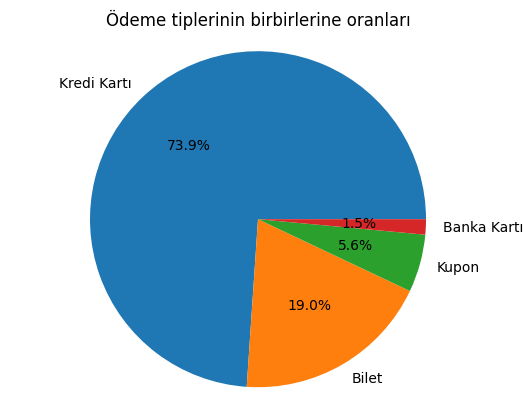

In [45]:
# Ödeme tiplerinin birbirlerine oranları görselleştirildi.

odeme_tipleri_degerleri = [76795, 19784, 5769, 1529]
odeme_tipleri = 'Kredi Kartı', 'Bilet', 'Kupon', 'Banka Kartı'
plt.pie(odeme_tipleri_degerleri, labels=odeme_tipleri, autopct='%1.1f%%')
plt.title('Ödeme tiplerinin birbirlerine oranları')
plt.axis('equal')
plt.show()

Ödeme tiplerinin birbirlerine oranlarını görselleştirmek için pasta grafiği kullanımı uygun görülmüştür. Matplotlib kütüphanesi kullanılmıştır ve ödeme isimleri Türkçeleştirilmiştir. Grafiğe göre;

* Kredi kartı %73.9 ile en çok kullanılan ödeme türüdür.

* İkinci sırada %19.0 ile Brezilya'da sık kullanılan orijinal adı "boleto" olan bilet ödeme yöntemi yer almaktadır.

* Üçüncü sırada %5.6 ile kupon ödeme yöntemi yer almaktadır.

* Son sırada ise %1.5 ile banka kartı ödeme yöntemi yer almaktadır. 


**Alt Analiz** / Ödeme miktarı ile taksit yapma arasında ilişki var mı?

---

Sadece kredi kartı kullanan müşteriler taksit imkanından faydalanabiliyorlar. 

Fakat diğer ödeme yöntemleri için de taksit sütununda "1" değeri yazmaktadır. Bu noktada sadece kredi kartı kullanan müşterilerin üzerinden korelasyon araştırması yapmak daha uygun olacaktır. 

In [46]:
# kredi kartı kulanan dışındaki müşteriler çıkartıldı.

sadece_kredi_karti_kullananlar = orderPayments.drop(orderPayments.loc[orderPayments['odeme_tipi']!="credit_card"].index)
sadece_kredi_karti_kullananlar

,siparis_no,odeme_sirasi,odeme_tipi,taksit,odeme_miktari
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103879,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94
103880,7159096c5aa9be77f7f0c26c01ee9793,1,credit_card,4,280.65
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77


/var/folders/8q/pv526c495g7_d_rpqw_h2b400000gn/T/ipykernel_3237/1867385582.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(sadece_kredi_karti_kullananlar.corr(), annot= True)


<AxesSubplot: >

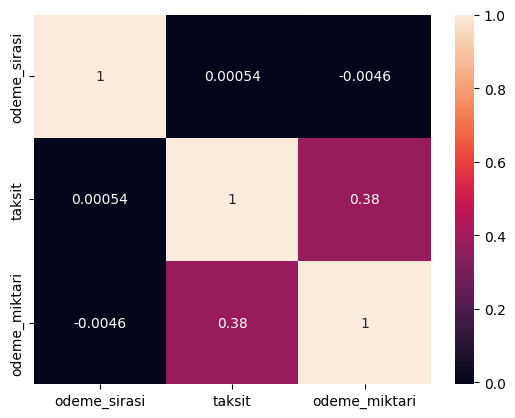

In [47]:
sns.heatmap(sadece_kredi_karti_kullananlar.corr(), annot= True)

**Yapılan ek analize göre;**

* Isı haritasına baktığımızda kredi kartı kullanan müşterilerin, ödeme miktarı ve taksit miktarları arasında zayıf pozitif korelasyon olduğu söylenebilir. (r = 0.38)


**Çıkarılabilecek Yorumlar;**

* Elde edilen korelasyon katsayısına bakılarak, ödeme miktarı arttıkça müşterilerin daha çok taksit yaptığı çıkarımı net bir şekilde yapılamaz, çünkü ilişki yeterince güçlü değildir. 

### **4. ANALİZ**
---

* Aylara göre sipariş sayısı

In [48]:
# tarih belirten sütun, ay ve yıl belirtecek şekilde düzenlendi. Veri setine kolon eklendi 

orders["satin_alma_ay"] = orders["urun_satin_alinma_zamani"].dt.month
orders["satin_alma_yil"] = orders["urun_satin_alinma_zamani"].dt.year

head_tail_df(orders)

----------------------------- Head -----------------------------
                         siparis_no                        musteri_no  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  siparis_durumu urun_satin_alinma_zamani siparis_onay_zamani  \
0      delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1      delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2      delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3      delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4      delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  siparis_nakliye_teslim_tarihi siparis_musteri_teslim_tarihi  \
0           2017-10-04 19:55:00         

In [49]:
# yıl ve aylara göre gruplama yapılarak sipariş sayısı belirlendi ve sıralama yapılarak, grafik için uygun hale getirildi. 

aylaraGoreSiparis = orders.groupby("satin_alma_yil")["satin_alma_ay"].value_counts(ascending=True).reset_index(name = "dagilim").sort_values(["satin_alma_yil", "satin_alma_ay"], ascending = True)
aylaraGoreSiparis

,satin_alma_yil,satin_alma_ay,dagilim
1,2016,9,2
2,2016,10,300
0,2016,12,1
3,2017,1,797
4,2017,2,1763
6,2017,3,2649
5,2017,4,2386
8,2017,5,3671
7,2017,6,3229
9,2017,7,3998


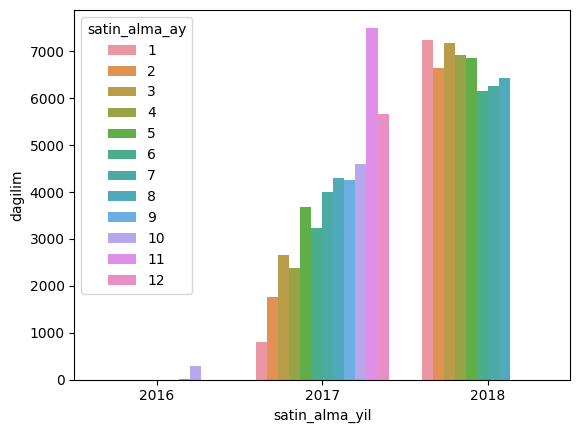

In [50]:
# oluşturulan tabloya göre grafik oluşturuldu. 

sns.barplot(x = "satin_alma_yil", y = "dagilim", hue = "satin_alma_ay", data = aylaraGoreSiparis);

**Aylara göre sipariş sayısı değişimini göstermek amacıyla çaprazlama yapılarak bar grafiği oluşturulmuştur. Grafiğe göre;**

**2016 yılında;** 
* 10, 11 ve 12. aylarda satış sayıları 2017 ve 2018 yıllarına göre düşük kalmıştır.

* 2016 yılının en yüksek sipariş alındığı ay ekim ayı olarak belirlenmiştir. 


**2017 yılında;** 
* Tüm aylarda alışveriş miktarı net bir şekilde görülebilmektedir. 

* Ocak ayından itibaren ufak dalgalanmalar ile yükselen bir sipariş oranına sahip olduğu gözlenmektedir. 

* Kasım ayında diğer aylardan öne çıkan bir şekilde fazla sipariş olduğu gözlemlenmekle birlikte, aralık ayı kasım ayına yaklaşamamış fakat ekim ayının da üstünde seyretmiştir. 


**2018 yılında;** 
* Ağustos ayına kadar olan sipariş miktarları gözlenmektedir. 

* 2017 yılında artan sipariş trendi 2018 yılında da ufak dalgalanmalar olsa dahi varlığını sürdürmüş ve 2017 kasım ayı miktarına yaklaşık bir şekilde seyretmiştir. 

**Çıkarılabilecek yorumlar;**
1. 2016 yılı verilerine bakıldığında 2017 ve 2018 yıllarından bariz bir şekilde az sipariş alındığı gözlenmektedir. Bu grafiğe bakılarak veri setlerini elimizde bulundurduğumuz Brezilya e-ticaret sitesinin 2016 yılında aktif olduğu çıkarımı yapılabilir. 

2. 2017 yılı kasım ayınca tüm dünyada etkisini gösteren "Kara Cuma" indirimleri sebebiyle artış olduğu düşünülebilir. 

3. Brezilya e-ticaret sitesinin 2017 sonu ve 2018 başında kemik bir müşteri kitlesine sahip olduğu varsayımı yapılabilir. 


### **5. ANALİZ**
---

* Hangi satıcı ne kadar ürün sattı?

In [51]:
# satıcı no ve fiyat gruplandırması yapıldı ve bu gruplandırma üzerinden
# satıcıların sattıkları ürün miktarı, ortalamaları, min ve max değerlerini gösteren bir tablo oluşturuldu.

satici_siparis_incelemesi = orderItems.groupby("satici_no")["fiyat"].agg(["count", "sum", "min", "max", "mean"]).sort_values(by = "sum", ascending = False)
satici_siparis_incelemesi

,count,sum,min,max,mean
satici_no,,,,,
4869f7a5dfa277a7dca6462dcf3b52b2,1156,229472.63,54.90,899.99,198.505735
53243585a1d6dc2643021fd1853d8905,410,222776.05,170.00,1649.99,543.356220
4a3ca9315b744ce9f8e9374361493884,1987,200472.92,12.90,884.00,100.892260
fa1c13f2614d7b5c4749cbc52fecda94,586,194042.03,84.90,3999.90,331.129744
7c67e1448b00f6e969d365cea6b010ab,1364,187923.89,29.99,401.34,137.774113
...,...,...,...,...,...
34aefe746cd81b7f3b23253ea28bef39,1,8.00,8.00,8.00,8.000000
702835e4b785b67a084280efca355756,1,7.60,7.60,7.60,7.600000
1fa2d3def6adfa70e58c276bb64fe5bb,1,6.90,6.90,6.90,6.900000


**Yapılan analiz çalışmasına göre;**

* Satıcılar en çok satış yapandan, en az satış yapana doğru sıralanmıştır. 

**En çok satış yapan satıcının;** 
* 1156 ürün ile, toplamda 229472.63 Euro'luk satış yaptığı 

* Ortalama satış yaptığı ürün fiyatı 198.51 Euro olduğu 

* Maksimum ürün fiyatının 899.99 Euro

* Minimum ürün fiyatının 54.90 Euro 

olduğu saptanmıştır. 

**Çıkarılabilecek yorumlar;**
* Listede yer alan ilk 5 satıcı incelendiğinde birinci, üçüncü ve beşinci satıcıların çok satış yaparak, ortalama ürün fiyatı ile ilerlediği söylenebilir. 

    - Birinci satıcı 54.90 - 889.99 fiyat aralığında, 198.51 Euro ortalama ile 1156 adet ürün satmıştır. 

    - Benzer şekilde üçüncü satıcı 12.90 - 884.00 Euro fiyat aralığında, 100.89 Euro ortalama ile 1987 ürün satmıştır.

    - Beşinci satıcı ise 29.99 - 401.34 Euro fiyat aralığında, 137.77 Euro ortalama ile 1364 ürün satmıştır. 

* Bunun yanı sıra ikinci ve dördüncü satıcıların daha yüksek fiyat bandında daha az ürün satarak yüksek gelir elde ettiği söylenebilir.

    - İkinci satıcı 170.00 - 1649.99 Euro fiyat aralığında, 543.36 Euro ortalama ile 410 ürün satmıştır. 

    - Dördüncü sırada yer alan satıcı 84.90 - 3999.90 Euro fiyat aralığında, 331.13 Euro ortalama ile 586 ürün satmıştır. 

### **6. ANALİZ** 
---

* Yüksek satış miktarı ile yüksek değerlendirme puanı arasında bir ilişki var mı?

In [52]:
# orderItems ve orderReviews veri setleri sipariş numarası üzerinden birleştirildi.
# satıcı no ve değerlendime puanı gruplaması yapıldı ve analiz için gerekli olan sayısal bilgilere erişildi.

siparis_degerlendirme_merged_df = pd.merge(orderItems, orderReviews, on="siparis_no", how="inner").groupby("satici_no")["degerlendirme_puan"].agg(["count","mean"])
siparis_degerlendirme_merged_df.rename( columns = {"count":"toplam_siparis", "mean":"ortalama"}, inplace = True)
siparis_degerlendirme_merged_df


,toplam_siparis,ortalama
satici_no,,
0015a82c2db000af6aaaf3ae2ecb0532,3,3.666667
001cca7ae9ae17fb1caed9dfb1094831,236,3.902542
001e6ad469a905060d959994f1b41e4f,1,1.000000
002100f778ceb8431b7a1020ff7ab48f,56,3.982143
003554e2dce176b5555353e4f3555ac8,1,5.000000
...,...,...
ffcfefa19b08742c5d315f2791395ee5,1,1.000000
ffdd9f82b9a447f6f8d4b91554cc7dd3,20,4.250000
ffeee66ac5d5a62fe688b9d26f83f534,14,4.214286


In [53]:
# Belirli bir adet sayısı altındaki satıcılar analizin sağlıklı olmasını etkileyecektir. 
# 10'dan daha az satış yapmış olan satıcılar çıkartıldı. 

cleaned_siparis_degerlendirme_merged_df = siparis_degerlendirme_merged_df[siparis_degerlendirme_merged_df['toplam_siparis'] > 10]

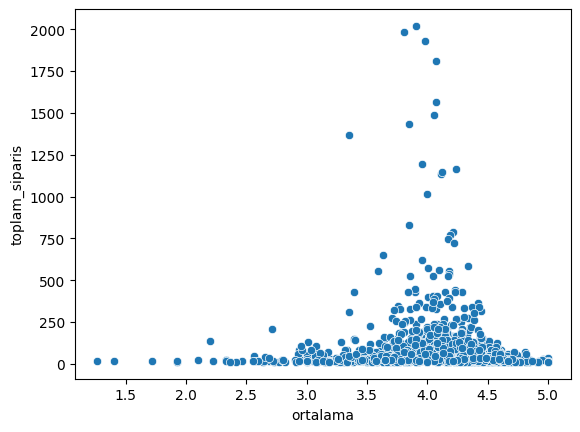

In [54]:
# toplam sipariş sayısı ile ortalama değerlendirme puanı arasındaki ilişkiye bakmak için saçılım grafiği oluşturuldu. 

sns.scatterplot(x = "ortalama", y = "toplam_siparis", data = cleaned_siparis_degerlendirme_merged_df);

(1.0, 5.186842105263158)

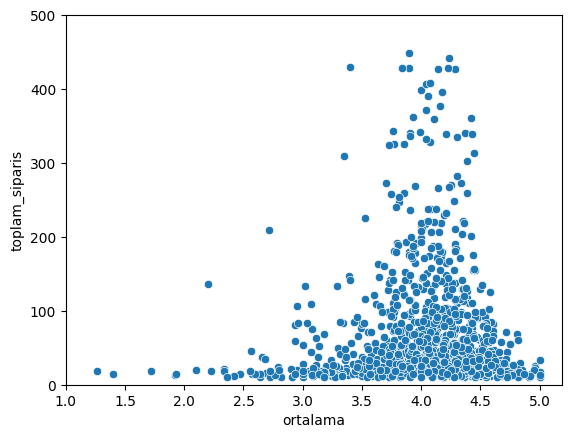

In [55]:
# ürün müktarının daha çok yoğunlaştığı 0-500 ürün aralığını daha iyi değerlendirebilmek adına 
# y ekseni daraltılarak grafik oluşturuldu. 

sns.scatterplot(x = "ortalama", y = "toplam_siparis", data = cleaned_siparis_degerlendirme_merged_df);
plt.ylim(0, 500)
plt.xlim(1, None)


**Yapılan analiz çalışmasına göre;**

* Satıcıların aldığı sipariş miktarı ile puanları arasında doğrusal bir ilişki olmadığı gözlemlenmiştir. 

**Çıkarılabilecek yorumlar;**

1. Satıcıların çoğunluğunun 200 ürün ve altında ürün sattığı söylenebilir.

2. Satıcıların aldıkları ortalama puanların daha çok 3.5-4.5 bandında yoğunlaştığı ve en çok satış yapanların ortalama puanlarının 3.3-4.3 bandında yer aldığı söylenebilir. 

3. Çok düşük puan alan satıcıların az ürün sattıkları ve az sayıda satıcının bu alanda yer aldığı gözlemlenmektedir, fakat bunun yanında çok yüksek ortalamaya sahip olan satıcıların da satış miktarı azdır. 

4. Çok ürün satan satıcıların, bu satış oranlarına bakılarak tüm müşterilerden çok yüksek puanlar almadığı görülmekte, bu durumun farklı beklentilere sahip olan müşterilerin her birinin beklentilerinin tam bir şekilde karşılanmadığı fakat genel olarak ortalama üstü bir ürün performansı gösterildiği söylenebilir. 



### **7. ANALİZ**
---
* Hangi kategoriden ne kadar ürün satışı yapıldı?

In [56]:
# orderItems ve products veri setleri ürün numarası üzerinden merge edildi. Bu işlemin ardından kategorileri anlayabilmek için
# ingilizce isimlerinin yer aldığı productCategory veri seti merge işlemi gerçekleştirildi. 

urun_kategori_merge = pd.merge(orderItems,products[['urun_no','orijinal_kategori_adi']],on='urun_no', how='inner')
urun_kategori_ingkategori_merge = urun_kategori_merge.merge(productCategory, on = "orijinal_kategori_adi", how = "left")
urun_kategori_ingkategori_merge

,siparis_no,siraris_adet_no,urun_no,satici_no,sevkiyat_tarihi,fiyat,kargo_ucreti,orijinal_kategori_adi,ingilizce_kategori_adi
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,cool_stuff
...,...,...,...,...,...,...,...,...,...
112645,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,d1c7fa84e48cfa21a0e595167c1c500e,2018-07-18 20:23:55,129.9,51.20,ferramentas_jardim,garden_tools
112646,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,0241d4d5d36f10f80c644447315af0bd,2018-08-21 10:10:11,99.0,13.52,moveis_decoracao,furniture_decor
112647,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.0,20.91,relogios_presentes,watches_gifts
112648,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.9,44.02,esporte_lazer,sports_leisure


In [57]:
# kategoriler sipariş sayılarına göre sıralandı. 

urun_kategori_ingkategori_merge.ingilizce_kategori_adi.value_counts()

bed_bath_table                             11115
health_beauty                               9670
sports_leisure                              8641
furniture_decor                             8334
computers_accessories                       7827
housewares                                  6964
watches_gifts                               5991
telephony                                   4545
garden_tools                                4347
auto                                        4235
toys                                        4117
cool_stuff                                  3796
perfumery                                   3419
baby                                        3065
electronics                                 2767
stationery                                  2517
fashion_bags_accessories                    2031
pet_shop                                    1947
office_furniture                            1691
consoles_games                              1137
luggage_accessories 

*71 adet satır olduğundan bir grafik çalışması yapılması karışık gözükecektir, bu sebeple yapılmamıştır.* 

**Yapılan analiz çalışmasına göre;**

*  11115 adet sipariş ile yatak odası, banyo ve masa ürünleri **ilk sırada** yer almaktadır.
* **İkinci sırada** sağlık ve güzellik ürünleri, 
* **Üçüncü sırada** spor-eğlence, 
* **Dördüncü sırada** mobilya-dekor 
* **Beşinci sırada** bilgisayar aksesuarları yer almaktadır. 

En sonda yer alan kategorilere göz attığımızda ise; 

* Güvenlik-hizmetler kategorisi 2 satış ile 71. sırada
* Çocuk kıyafetleri kategorisi 70. sırada 
* Mutfak ürünleri kategorisi 69. sırada 
* DVD-CD müzik kategorisi ise 68. sırada 

yer almaktadır. 


### **8. ANALİZ**
---
* Kategorilere göre fiyat ortalaması ne kadardır?

In [58]:
# ingilizce kategori adı ve fiyat gruplandırması yapıldı. Gruplandırma işleminin ardından analiz için gerekli olacak 
# sayısal veriler tablo haline getirildi ve "mean" sütununa göre sıralama yapıldı. 

kategorilere_gore_fiyat_ort = urun_kategori_ingkategori_merge.groupby("ingilizce_kategori_adi")["fiyat"].agg(["count", "sum", "min", "max", "mean"]).sort_values(by = "mean", ascending = False)
kategorilere_gore_fiyat_ort

,count,sum,min,max,mean
ingilizce_kategori_adi,,,,,
computers,203,222963.13,34.50,6729.00,1098.340542
small_appliances_home_oven_and_coffee,76,47445.71,10.19,2899.00,624.285658
home_appliances_2,238,113317.74,13.90,2350.00,476.124958
agro_industry_and_commerce,212,72530.47,12.99,2990.00,342.124858
musical_instruments,680,191498.88,4.90,4399.87,281.616000
small_appliances,679,190648.58,6.50,4799.00,280.778468
fixed_telephony,264,59583.00,6.00,1790.00,225.693182
construction_tools_safety,194,40544.52,8.90,3099.90,208.992371
watches_gifts,5991,1205005.68,8.99,3999.90,201.135984


**Yapılan analiz çalışmasına göre;**

Ortalama fiyata bakıldığında;

1. sırada 1098.34 Euro ile bilgisayar kategorisi
2. sırada 624.28 Euro ile küçük ev-fırın-kahve gereçleri kategorisi
3. sırada 476.12 Euro ile ev gereçleri kategorisi
4. sırada 342.12 Euro ile tarımsal endüstri ve ticaret kategorisi
5. sırada 281.62 Euro ile müzik aletleri kategorisi

yer almaktadır. 


Ortalaması en az olan ürünlere bakıldığında;

71. sırada 25.34 Euro ile ev konforu kategorisi
70. sırada 33.64 Euro ile çiçek kategorisi
69. sırada 40.19 Euro ile çocuk bezi ve hijyen kategorisi

yer almaktadır. 


**Çıkarılabilecek yorumlar;**

* 7. analizde yapılmış olan ürün satışı miktarı ve 8. analizde yapılmış olan ortalama sepet tutarı analizleri karşılaştırıldığında, en çok satan ürünlerin ortalama fiyatlarının listenin başında yer almadığı gözlemlenmektedir. Buradan yola çıkarak müşterilerin Brezilya e-ticaret sitesinden alışveriş yaparken pahalı ürünlerden ziyade daha düşük fiyatlı ürünlere rağbet gösterdiği yorumu yapılabilir. 

**8. Analiz için yapılan yorumu test edelim:**


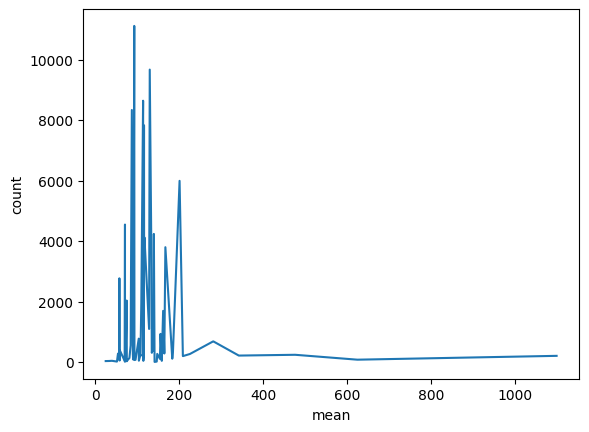

In [59]:
sns.lineplot(x = "mean", y = "count", data = kategorilere_gore_fiyat_ort);

* Grafiği incelediğimizde kategorilerin ortalama fiyatı arttıkça satın alınan miktarın azaldığı görülmektedir. 

* En çok satan kategorilerin fiyat ortalaması düşüktür. 

* Fiyatı düşük olan kategorilerdeki satış oranları da dalgalanma göstermektedir. Düşük fiyat direkt olarak çok satış anlamına gelmemektedir. 

### **9. ANALİZ**
---
**Alt Analizler:**

1. Satıcıların siparişlerini kargoya verme hızı ortalamaları.

2. Ürünlerin müşteriye ortalama ulaştığı süre.



**Analiz Ön Çalışması**

---

In [60]:
# yapılacak analizlerde henüz müşteriye ulaşmayan siparişler ile alakalı bilgilere ihtiyaç olmadığından,
# null veri içeren satırlar silindi. 

orders.dropna(inplace = True)
info_df(orders)

----------------------------- Shape -----------------------------
(96455, 10)
----------------------------- Info -----------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 96455 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   siparis_no                     96455 non-null  object        
 1   musteri_no                     96455 non-null  object        
 2   siparis_durumu                 96455 non-null  object        
 3   urun_satin_alinma_zamani       96455 non-null  datetime64[ns]
 4   siparis_onay_zamani            96455 non-null  datetime64[ns]
 5   siparis_nakliye_teslim_tarihi  96455 non-null  datetime64[ns]
 6   siparis_musteri_teslim_tarihi  96455 non-null  datetime64[ns]
 7   siparis_tahmini_teslim_zamani  96455 non-null  datetime64[ns]
 8   satin_alma_ay                  96455 non-null  int64         
 9   satin_

In [61]:
# yapılacak analizler için müşterinin siparişi verme zamanı ile satıcının siparişi 
# kargoya verme zamanı ve müşterinin siparişi verme zamanı ile müşteriye teslim zamanı arasınaki fark bulundu.

orders["siparisxkargoVerilis_zaman_farki"] = orders["siparis_nakliye_teslim_tarihi"] - orders["urun_satin_alinma_zamani"]
orders["siparisxmusteriUlasma_zaman_farki"] = orders["siparis_musteri_teslim_tarihi"] - orders["urun_satin_alinma_zamani"]

head_tail_df(orders)

----------------------------- Head -----------------------------
                         siparis_no                        musteri_no  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  siparis_durumu urun_satin_alinma_zamani siparis_onay_zamani  \
0      delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1      delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2      delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3      delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4      delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  siparis_nakliye_teslim_tarihi siparis_musteri_teslim_tarihi  \
0           2017-10-04 19:55:00         

**1. Alt Analiz** / Satıcıların siparişlerini kargoya verme hızı ortalamaları.

---

In [62]:
# siparişin alınıp kargoya verildiği zaman arasında ortalama geçen süre bulunmuştur. 

orders.siparisxkargoVerilis_zaman_farki.describe()

count                        96455
mean     3 days 05:27:17.526328339
std      3 days 14:20:57.604172502
min            -172 days +18:54:07
25%         1 days 03:02:45.500000
50%                2 days 04:49:44
75%                4 days 01:36:11
max              125 days 18:36:45
Name: siparisxkargoVerilis_zaman_farki, dtype: object

* Tabloya bakıldığında siparişin alınması ve kargoya verilmesi zaman farkı negatif olarak gözüken değerler vardır ve bu durum mümkün değildir. 

* Bu sebeple tabloyu sıralayarak negatif değerlerin kontrolü yapılacaktır.

In [63]:
# negatif değerlere ulaşmak için siparisxkargoVerilis_zaman_farki sıralandı.

orders.sort_values(by = ["siparisxkargoVerilis_zaman_farki"])

,siparis_no,musteri_no,siparis_durumu,urun_satin_alinma_zamani,siparis_onay_zamani,siparis_nakliye_teslim_tarihi,siparis_musteri_teslim_tarihi,siparis_tahmini_teslim_zamani,satin_alma_ay,satin_alma_yil,siparisxkargoVerilis_zaman_farki,siparisxmusteriUlasma_zaman_farki
25883,7c48bb55e8e4f7e56d412e9653db37bc,34ef6181341eb36c47fd601c46878f00,delivered,2018-07-16 18:40:53,2018-07-16 18:50:22,2018-01-26 13:35:00,2018-07-23 20:04:45,2018-08-07,7,2018,-172 days +18:54:07,7 days 01:23:52
83321,4021cd7611d6d9ce5ffcd24817fc374f,ac27243bffbc9c58eb62adfb58c71488,delivered,2018-08-18 11:49:40,2018-08-18 12:10:30,2018-08-14 06:22:00,2018-08-29 04:41:53,2018-08-30,8,2018,-5 days +18:32:20,10 days 16:52:13
67844,db090a16182b263b1e896bb26c6f66cf,b58a35cb4e1a1f9ea74dcf0b2639a9ac,delivered,2018-07-13 16:14:08,2018-07-13 16:44:09,2018-07-13 13:59:00,2018-07-27 11:34:31,2018-08-06,7,2018,-1 days +21:44:52,13 days 19:20:23
65452,9711d975b961355b4b5d636857e48498,93ae1bda7d91d89da9fbccb5e1da3d48,delivered,2018-06-13 15:23:50,2018-06-13 15:38:18,2018-06-13 13:15:00,2018-06-26 00:33:48,2018-06-29,6,2018,-1 days +21:51:10,12 days 09:09:58
79401,89d32b64af005178b318f76cd60f2c3c,41932cfbabbfcfd18e1369ad72baff9c,delivered,2018-07-06 11:54:40,2018-07-06 12:11:05,2018-07-06 09:48:00,2018-07-10 11:44:45,2018-07-27,7,2018,-1 days +21:53:20,3 days 23:50:05
...,...,...,...,...,...,...,...,...,...,...,...,...
71854,5cc475c7c03290048eb2e742cd64cb5e,75e8f990b9e289013b1d092614b52487,delivered,2016-10-04 21:54:52,2016-10-05 03:10:31,2016-12-06 17:24:00,2016-12-12 20:31:54,2016-11-24,10,2016,62 days 19:29:08,68 days 22:37:02
44200,866314550f6d7a55c82917d9b4463e1f,9009e9f0ac28d47bd18433d82aa028d6,delivered,2017-11-16 14:55:04,2017-11-18 02:31:11,2018-01-21 16:12:17,2018-01-25 19:38:35,2017-12-13,11,2017,66 days 01:17:13,70 days 04:43:31
3077,8b7fd198ad184563c231653673e75a7f,3eddc75fe2314996f68ddcd89ddb5caf,delivered,2017-11-14 10:04:27,2017-11-17 08:47:00,2018-02-26 17:27:15,2018-02-27 18:05:08,2017-11-28,11,2017,104 days 07:22:48,105 days 08:00:41
35213,97f48024fcc76f1898e397ad6966e3a0,66d376416dfbdcb87ddc1f2384d343ba,delivered,2017-11-29 12:25:00,2017-11-29 12:41:24,2018-03-16 13:58:02,2018-03-16 13:58:10,2017-12-26,11,2017,107 days 01:33:02,107 days 01:33:10


* Tabloya bakıldığında negatif çıktı veren değerlerde hata olduğu gözlenmiştir. Örneğin -172 gün görünen değerin kargoya veriliş zamanı müşterinin ürünü aldığı zamandan önce görünmektedir. 

* Bu sebeple negatif olan değerler bu analiz işlemi için kullanılmayacaktır. 

In [64]:
# negatif değerler çıkarıldı ve analiz yapıldı(bu işlemler inplace edilmedi).

orders.drop(orders.loc[orders['siparisxkargoVerilis_zaman_farki'].astype('int') < 0 ].index).describe()


,satin_alma_ay,satin_alma_yil,siparisxkargoVerilis_zaman_farki,siparisxmusteriUlasma_zaman_farki
count,96290.000000,96290.000000,96290,96290
mean,6.030813,2017.543618,3 days 05:37:56.900633503,12 days 13:35:56.332142486
std,3.230653,0.503633,3 days 13:18:03.542152563,9 days 13:11:42.200475956
min,1.000000,2016.000000,0 days 00:00:32,0 days 12:48:07
25%,3.000000,2017.000000,1 days 03:07:40,6 days 18:33:58
50%,6.000000,2018.000000,2 days 04:55:10.500000,10 days 05:23:27
75%,8.000000,2018.000000,4 days 01:41:11.250000,15 days 17:33:10.250000
max,12.000000,2018.000000,125 days 18:36:45,209 days 15:05:12


**Yapılan analize göre;**

* Müşteriler e-ticaret sitesinden alışveriş yaptıktan sonra, satıcının siparişleri kargoya vermesi ortalama **3 gün 5 saat 38 dakika** sürmektedir. 

**2. Alt Analiz** / Ürünlerin müşteriye ortalama ulaştığı süre.


---

In [65]:
# sipariş alınma zamanı ve müşteriye ulaşma zamanı arasındaki zaman farkı bilgilerine ulaşıldı. 

orders.siparisxmusteriUlasma_zaman_farki.describe()

count                         96455
mean     12 days 13:23:04.654719817
std       9 days 13:06:12.842960862
min                 0 days 12:48:07
25%                 6 days 18:22:19
50%                10 days 05:11:22
75%         15 days 17:17:00.500000
max               209 days 15:05:12
Name: siparisxmusteriUlasma_zaman_farki, dtype: object

**Yapılan analize göre;**

* Müşteriler ürünü satın aldıktan sonra, ürünlerin müşteriye ulaşma süresi ortalama **12 gün 12 saat 23 dakika**dır. 

### **10. ANALİZ** / Müşteri Davranışını Anlama
---
* Müşteriler, değerlendirmeleri iyi olduğunda mı yoksa kötü olduğunda mı daha hızlı değerlendirme puanı veriyorlar?

In [66]:
#data incelendi
info_df(orderReviews)

----------------------------- Shape -----------------------------
(99224, 7)
----------------------------- Info -----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype          
---  ------                          --------------  -----          
 0   degerlendirme_no                99224 non-null  object         
 1   siparis_no                      99224 non-null  object         
 2   degerlendirme_puan              99224 non-null  int64          
 3   degerlendirme_yorum             40977 non-null  object         
 4   degerlendirme_baslangic_zamani  99224 non-null  datetime64[ns] 
 5   degerlendirme_yapilis_zamanı    99224 non-null  datetime64[ns] 
 6   degerlendirme_zaman_farki       99224 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), object(3), timedelta64[ns](1)
memory usage: 5.3+ MB
None
----------------------------- NA --

In [67]:
head_tail_df(orderReviews)

----------------------------- Head -----------------------------
                   degerlendirme_no                        siparis_no  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   degerlendirme_puan                                degerlendirme_yorum  \
0                   4                                                NaN   
1                   5                                                NaN   
2                   5                                                NaN   
3                   5              Recebi bem antes do prazo estipulado.   
4                   5  Parabéns lojas lannister adorei comprar pela I...   

  degerlendirme_baslangic_zamani degerl

In [68]:
# degerlendirme saat farkı sütünunda gün ve saat olarak yer alan değişkenler analiz kolaylığı için saate çevrildi. 

orderReviews['saat_bazinda_fark'] = orderReviews['degerlendirme_zaman_farki'] / pd.Timedelta('1 hour')
orderReviews

,degerlendirme_no,siparis_no,degerlendirme_puan,degerlendirme_yorum,degerlendirme_baslangic_zamani,degerlendirme_yapilis_zamanı,degerlendirme_zaman_farki,saat_bazinda_fark
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,2018-01-18,2018-01-18 21:46:59,0 days 21:46:59,21.783056
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,2018-03-10,2018-03-11 03:05:13,1 days 03:05:13,27.086944
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,2018-02-17,2018-02-18 14:36:24,1 days 14:36:24,38.606667
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,0 days 22:02:06,22.035000
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1 days 10:26:53,34.448056
...,...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,2018-07-07,2018-07-14 17:18:30,7 days 17:18:30,185.308333
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,2017-12-09,2017-12-11 20:06:42,2 days 20:06:42,68.111667
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43,1 days 09:10:43,33.178611
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,2018-07-01,2018-07-02 12:59:13,1 days 12:59:13,36.986944


In [69]:
# değerlendirme zaman farkı (saat) ve değerlendirme puanı tablolaştırıldı, zaman farkı açısından sıralandı. 

degerlendirme_zaman_fark_df = orderReviews[['saat_bazinda_fark','degerlendirme_puan']].sort_values(by = ["saat_bazinda_fark"])
degerlendirme_zaman_fark_df

,saat_bazinda_fark,degerlendirme_puan
49291,2.141389,3
83108,2.406667,1
6676,2.421944,4
13330,2.436944,1
95333,2.454722,1
...,...,...
13920,10724.859444,5
8758,11320.331389,4
22059,12193.602500,5
66672,12303.793611,5


* Değerlendirme zamanları çok farklılık göstermektedir. Bu sebeple kısa zaman içerisinde yapılan değerlendirmeler inceleneceğinden, 1 haftadan sonra yapılan yorumlar analize dahil edilmeyecektir. Yapılan değerlendirmelerin zamanları gruplandırılacaktır. 

In [70]:
# 1 haftadan sonra yapılmış olan değerlendirmeler silindi.

bir_hafta_icindeki_degerlendirmeler = degerlendirme_zaman_fark_df.drop(degerlendirme_zaman_fark_df.loc[degerlendirme_zaman_fark_df['saat_bazinda_fark'] > 84].index)
bir_hafta_icindeki_degerlendirmeler

,saat_bazinda_fark,degerlendirme_puan
49291,2.141389,3
83108,2.406667,1
6676,2.421944,4
13330,2.436944,1
95333,2.454722,1
...,...,...
86114,83.998889,4
11488,83.998889,4
74304,83.998889,4
32762,83.999444,5


In [71]:
# yorum yapılan saat farkları, güne çevrilerek kategorize edildi.

def func_gunlere_ayirma(saat_bazinda_fark):
  if saat_bazinda_fark <= 12:
    return "1. Gün"
  elif saat_bazinda_fark <= 24:
    return "2. Gün"
  elif saat_bazinda_fark <= 36:
    return "3. Gün"
  elif saat_bazinda_fark <= 48:
    return "4. Gün"
  elif saat_bazinda_fark <= 60:
    return "5. Gün"
  elif saat_bazinda_fark <= 72:
    return "6. Gün"
  elif saat_bazinda_fark <= 84:
    return "7. Gün"

bir_hafta_icindeki_degerlendirmeler["kacinci_gun_degerlendirildi"] = bir_hafta_icindeki_degerlendirmeler.saat_bazinda_fark.apply(func_gunlere_ayirma)
bir_hafta_icindeki_degerlendirmeler

,saat_bazinda_fark,degerlendirme_puan,kacinci_gun_degerlendirildi
49291,2.141389,3,1. Gün
83108,2.406667,1,1. Gün
6676,2.421944,4,1. Gün
13330,2.436944,1,1. Gün
95333,2.454722,1,1. Gün
...,...,...,...
86114,83.998889,4,7. Gün
11488,83.998889,4,7. Gün
74304,83.998889,4,7. Gün
32762,83.999444,5,7. Gün


In [72]:
# degerlendirme ortalamaları alınarak, günlere göre karşılaştırılması yapıldı. 

degerlendirme_ort = (bir_hafta_icindeki_degerlendirmeler.groupby("kacinci_gun_degerlendirildi")["degerlendirme_puan"].agg(["mean"]))
degerlendirme_ort

,mean
kacinci_gun_degerlendirildi,
1. Gün,2.583333
2. Gün,4.058930
3. Gün,4.273232
4. Gün,4.183421
5. Gün,3.776646
6. Gün,4.134963
7. Gün,4.232901


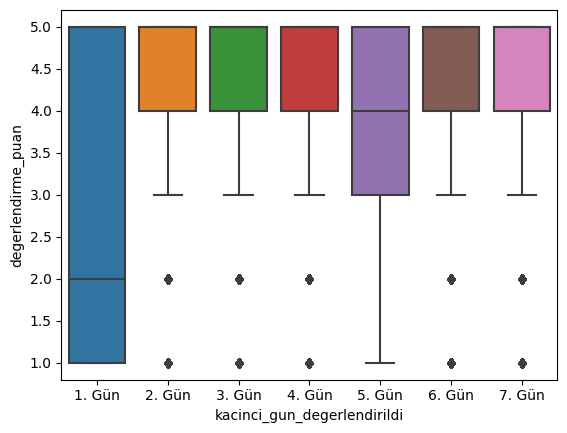

In [73]:
# genel dağılıma bakmak için verilerden kutu grafiği oluşturuldu. 

sns.boxplot(x = "kacinci_gun_degerlendirildi", y = "degerlendirme_puan", data = bir_hafta_icindeki_degerlendirmeler);

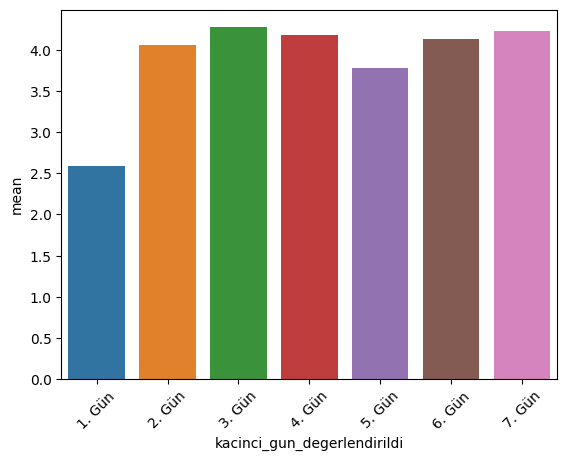

In [74]:
# değerlendirme ortalamaları ve günlere göre bar grafiği oluşturuldu.

degerlendirme_ort['kacinci_gun_degerlendirildi'] = degerlendirme_ort.index
sns.barplot(data=degerlendirme_ort, x="kacinci_gun_degerlendirildi", y="mean")
plt.xticks(rotation=45)
plt.show()

**Yapılan analizlere göre:**

**Kutu grafiğinde;** 

* 2, 3, 4, 6 ve 7. günlerde benzer bir dağılım olduğu görülmektedir. Aykırı değerler dışında değerlendirmeler ortalama aynı şekilde seyretmiştir ve çoğunlukla homojen bir yapıdadır. 

* Beşinci günde medyanın 4 olduğu gözlenmektedir ve birinci günle karşılaştırıldığında daha homojen bir yapıdadır. 

* Birinci güne baktığımızda bar grafiğinin oldukça heterojen bir yapıda olduğunu görüyoruz ve medyanı 2 puanda yer alıyor. 

**Bar Grafiğinde;**

* Bir hafta içerisinde yapılmış olan yorumlar incelendiğinde, ilk gün yapılan yorumların diğer günlere oranla 1-1.5 puan daha düşük olduğu gözlenmektedir. 


**Çıkarılabilecek yorumlar;**

* Müşteriler aldıkları ürünlerin düşük performans gösterdiğini veya kötü olduğunu düşündüklerinde daha hızlı bir şekilde değerlendirme yaptığı söylenebilir.

### **11. ANALİZ** / Müşteri Davranışını Anlama
---
* Müşteriler daha çok, iyi değerlendirme puanı verdiklerine mi yoksa kötü değerlendirme puanı verdiklerine mi yorum yapıyorlar?

In [75]:
# yorum yapılmayan satırlar çıkartıldı, sadece yorum olan satırlar analiz için kullanıldı. 

temp_yorum_analizi = orderReviews.dropna(subset = "degerlendirme_yorum")
temp_yorum_analizi

,degerlendirme_no,siparis_no,degerlendirme_puan,degerlendirme_yorum,degerlendirme_baslangic_zamani,degerlendirme_yapilis_zamanı,degerlendirme_zaman_farki,saat_bazinda_fark
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,0 days 22:02:06,22.035000
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1 days 10:26:53,34.448056
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-23 16:45:47,1 days 16:45:47,40.763056
12,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16,2018-02-20 10:52:22,4 days 10:52:22,106.872778
15,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,"Vendedor confiável, produto ok e entrega antes...",2018-05-23,2018-05-24 03:00:01,1 days 03:00:01,27.000278
...,...,...,...,...,...,...,...,...
99205,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,para este produto recebi de acordo com a compr...,2017-11-29,2017-11-30 15:52:51,1 days 15:52:51,39.880833
99208,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,Entregou dentro do prazo. O produto chegou em ...,2018-02-07,2018-02-19 19:47:23,12 days 19:47:23,307.789722
99215,a709d176f59bc3af77f4149c96bae357,d5cb12269711bd1eaf7eed8fd32a7c95,3,"O produto não foi enviado com NF, não existe v...",2018-05-19,2018-05-20 21:51:06,1 days 21:51:06,45.851667
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43,1 days 09:10:43,33.178611


In [76]:
# veri seti tam hali değerlendirme puanlarına göre gruplandırıldı.

tam_veri_degerlendirme = orderReviews["degerlendirme_puan"].value_counts(normalize=True) * 100
tam_veri_degerlendirme

5    57.776344
4    19.291704
1    11.513344
3     8.242965
2     3.175643
Name: degerlendirme_puan, dtype: float64

In [77]:
# veri setinin sadece yorum yazılanlar olan hali değerlendirme puanlarına göre gruplandırıldı.

sadece_yorumlu_degerlendirme = temp_yorum_analizi["degerlendirme_puan"].value_counts(normalize=True) * 100
sadece_yorumlu_degerlendirme


5    50.159846
1    21.341240
4    14.583791
3     8.680479
2     5.234644
Name: degerlendirme_puan, dtype: float64

In [78]:
# veri setinin yorum yazılanlar olmayan hali değerlendirme puanlarına göre gruplandırıldı.

sadece_yorumsuz_degerlendirme = ((orderReviews["degerlendirme_puan"].value_counts() - temp_yorum_analizi["degerlendirme_puan"].value_counts())*100/58247).sort_values(ascending = False)
sadece_yorumsuz_degerlendirme

5    63.134582
4    22.603739
3     7.935173
1     4.599379
2     1.727128
Name: degerlendirme_puan, dtype: float64

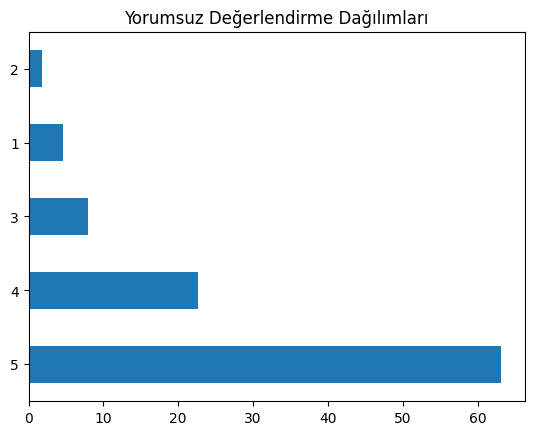

In [79]:
# yorum yapılmadan yapılan değerlendirme puanı dağılımları grafikleştirildi. 

sadece_yorumsuz_degerlendirme.plot.barh().set_title("Yorumsuz Değerlendirme Dağılımları");


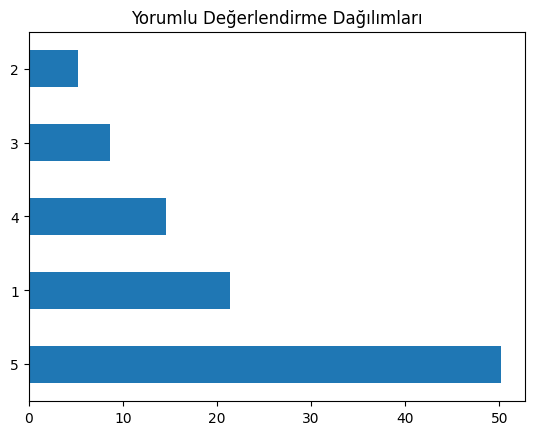

In [80]:
# yorum yapılarak yapılan değerlendirme puanı dağılımları grafikleştirildi. 

sadece_yorumlu_degerlendirme.plot.barh().set_title("Yorumlu Değerlendirme Dağılımları");


**Yapılan analizlere göre;**

* Her iki grafikte de en yüksek verilen değerlendirme puanları 5 puanda toplanmıştır. 

* İki grafik arasındaki fark, yorumlu olan değerlendirmelerde ikinci sırada gelen 1 puanın diğer grafikte çok daha aşağı sırada yer almasıdır. 

**Çıkarılabilecek yorumlar;**

* Müşterilerin hem yorum yazdıkları hem de yorum yazmadıkları senaryoda 5 puan vermeye eşit derecede yatkın oldukları görünmektedir. Fakat bunun yanı sıra 1 puan veren müşterilerin yorum yazmamak yerine yorum yazmayı daha çok tercih ettikleri söylenebilir. 

* Genel anlamda 1 puan veren müşteriler düşünüldüğünde, bu müşterilerin büyük çoğunluğunun yorum yaptığı çıkarımı yapılabilir. 


### **12. ANALİZ**
___

* En yüksek ve en düşük puan alan yorumlardaki en sık kullanılan 10 kelime ve 5 cümle. (1 puan ve 5 puan) 

In [81]:
# beş puan alan yorum satırları filtrelendi, küçük harfe çevrildi ve özel ifadeler replace edildi. 

bes_puanli_yorumlar = temp_yorum_analizi[(temp_yorum_analizi.degerlendirme_puan == 5)]["degerlendirme_yorum"].str.lower().str.strip().str.replace("ã","a").str.replace("á", "a").str.replace("é", "e").str.replace("ó", "o")
bes_puanli_yorumlar

3                    recebi bem antes do prazo estipulado.
4        parabens lojas lannister adorei comprar pela i...
15       vendedor confiavel, produto ok e entrega antes...
22                                            loja nota 10
24                   obrigado pela atençao amim dispensada
                               ...                        
99191    gostei muito.\r\ne a segunda vez que compro o ...
99196    ficamos muito satisfeitos com o produto, atend...
99202    produto original,prazo de entrega rapido.super...
99208    entregou dentro do prazo. o produto chegou em ...
99221    excelente mochila, entrega super rapida. super...
Name: degerlendirme_yorum, Length: 20554, dtype: object

In [82]:
# 1 puan alan yorum satırları filtrelendi, küçük harfe çevrildi ve özel ifadeler replace edildi.  

bir_puanli_yorumlar = temp_yorum_analizi[(temp_yorum_analizi.degerlendirme_puan == 1)]["degerlendirme_yorum"].str.lower().str.strip().str.replace("ã","a").str.replace("á", "a").str.replace("é", "e").str.replace("ó", "o")

bir_puanli_yorumlar


19                                                 pessimo
29                     nao gostei ! comprei gato por lebre
32       sempre compro pela internet e a entrega ocorre...
39                            nada de chegar o meu pedido.
51       recebi somente 1 controle midea split estilo.\...
                               ...                        
99094    gostaria de saber porque meu produto ainda nao...
99141    ate hoje dia 21/10/2017 o pedido nao foi entre...
99155    eu recebi o seguinte email e preciso saber com...
99169    boa tarde. \r\nnao recebo todos os produtos fa...
99223    meu produto chegou e ja tenho que devolver, po...
Name: degerlendirme_yorum, Length: 8745, dtype: object

In [83]:
# tokenize edilmeden önce noktalama işretleri kaldırıldı.

def remove_punc(text):
    title = text.translate(str.maketrans(" ", " ",string.punctuation))
    return title

bes_puanli_yorumlar["remove_punc"] = bes_puanli_yorumlar.apply(remove_punc)
bir_puanli_yorumlar["remove_punc"] = bir_puanli_yorumlar.apply(remove_punc)

In [84]:
# 5 puan alan yorumlar kelimelerine ayrıldı, bir listeye eklendi ve en çok tekrar eden 10 kelime bulundu.  

l = []

for row in bes_puanli_yorumlar["remove_punc"]: 
    tokens = word_tokenize(row)
    l.append(tokens)

Counter(chain(*l)).most_common(10)

[('produto', 7963),
 ('e', 7775),
 ('do', 6066),
 ('prazo', 5539),
 ('muito', 5336),
 ('o', 5313),
 ('antes', 4513),
 ('a', 3849),
 ('de', 3753),
 ('entrega', 3619)]

In [85]:
#5 puan alan yorumlarda en çok tekrar eden 5 yorum bulundu

bes_puanli_yorumlar= bes_puanli_yorumlar.str.rstrip().str.lower()
Counter(bes_puanli_yorumlar).most_common(10)

[('otimo', 368),
 ('muito bom', 363),
 ('recomendo', 170),
 ('excelente', 145),
 ('bom', 140),
 ('otimo produto', 95),
 ('ok', 93),
 ('tudo ok', 73),
 ('otima', 70),
 ('boa', 42)]

In [86]:
# 1 puan alan yorumlar kelimelerine ayrıldı, bir listeye eklendi ve en çok tekrar eden 10 kelime bulundu. 

l = []

for row in bir_puanli_yorumlar["remove_punc"]: 
    tokens = word_tokenize(row)
    l.append(tokens)

Counter(chain(*l)).most_common(10)

[('o', 7022),
 ('nao', 7015),
 ('e', 6453),
 ('produto', 5029),
 ('de', 4036),
 ('a', 3942),
 ('que', 3194),
 ('recebi', 2766),
 ('do', 1935),
 ('um', 1902)]

In [87]:
#1 puan alan yorumlarda en çok tekrar eden 5 yorum bulundu

bir_puanli_yorumlar= bir_puanli_yorumlar.str.rstrip().str.lower()
Counter(bir_puanli_yorumlar).most_common(5)

[('nao recebi o produto', 76),
 ('ainda nao recebi o produto', 27),
 ('nao recebi', 25),
 ('ainda nao recebi', 14),
 ('nao recebi o produto.', 14)]

*İyelik belirten veya bağlaç olan kelimeler sayıma alınmayabilirdi fakat dil Portekizce olduğundan ve dil bilgisi yeterli olmadığından bu işlem gerçekleştirilmemiştir.*

**Yapılan analize göre;**

**Tam puan değerlendirme veren müşterilerin;**

* En çok kullandığı kelimeler **ürün, son tarih, çok ve teslimat** kelimeleridir. 

* En çok kullanılan yorum kalıpları ise;
    * Harika (368)
    * Çok iyi (363)
    * Tavsiye ediyorum (170)
    * Mükemmel (145)
    * İyi (140)

**Değerlendirme puanı en düşük veren müşterilerin;**

* En çok kullandığı kelimeler **hayır, ürün, aldım** kelimeleridir. 

* En çok kullanılan yorum kalıpları ise;
    * Ürünü teslim almadım (76)
    * Ürün hala elime ulaşmadı (27)
    * Ben almadım (25)
    * Ben almadım (14)
    * Ürünü teslim almadım (14)


**Çıkarılabilecek yorumlar;**

* Kelime bazında yapılan analizlerden anlamlı sonuçlar çıkmamıştır. Fakat değerlendirme puanı 5 olan müşterilerin en sık kullandığı kelimeler arasında "teslimat" kelimzesinin yer alması hızlı teslimat ve bunun müşteri açısından yarattığı olumlu etkiye işaret ediyor olabilir. 

* Yorum kalıpları açısından yapılan değerlendirmeye bakıldığında ise, tam puan veren müşterilerin olumlu kısa yorumlarının yanında, 1 puan veren müşterilerin ortak şikayetlerinin ürünün ellerine ulaşmaması olduğu çıkarımı yapılabilir. 